<a href="https://colab.research.google.com/github/kolllurisiripavan/kolllurisiripavan/blob/main/siripavan_ecp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Energy Consumption and Prediction Project






Step1: Data Explorations
Importing libraries


### Reading Dataset
##### The file  is read with a semicolon (;) separator
#####household_power_consumption

In [ ]:
import pandas as pd
import numpy as anp

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=00bfa885-0bf7-42fc-81d5-bb8f7abb014c
To: /content/household_power_consumption.txt
100% 133M/133M [00:02<00:00, 47.5MB/s]


In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")

<ipython-input-5-68e29b680bbb>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt',sep=";")


observation reading the data set is done

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Observation
##### It displayed first 5 rows

In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### Observation
##### It displayed last 5 rows

#### 'describe()' gives a statistical summary for numerical columns: count, mean, min, max, std deviation

In [ ]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


#### This returns the number of rows and columns

In [ ]:
df.shape

(2075259, 9)

### Observation
##### Dataset has 9 Colums and 2075259 Rows

In [ ]:
df.describe(include = object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


### Observation
##### There are some unique values and missing values

#### 'nunique()' returns the number of unique values in each column

In [ ]:
df.nunique()

,0
Date,1442
Time,1440
Global_active_power,6534
Global_reactive_power,896
Voltage,5168
Global_intensity,377
Sub_metering_1,153
Sub_metering_2,145
Sub_metering_3,32


#### 'info()' provides details about column names, data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Observation
##### The dataset consists of multiple columns, including both numerical and object types

##### Combined 'Date' and 'Time' columns to create a new 'Datetime' column

#### I combined date and time colums because -

#####      Use time-based indexing to easily filter or retrieve data from a specific time range

######     Calculate time intervals between different records

In [ ]:
edf['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)

##### Columns that represent numerical values but stored as strings are converted using 'to_numeric'
##### 'errors=coerce' converts non-convertible values to NaN

In [ ]:
cols_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in cols_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


### Observation
##### All Datatypes changed to float and datetime colums create with datetime datatype

### Checking for null values
#### 'isnull().any()' checks if there are any null values

In [ ]:
df.isnull().any()

,0
Global_active_power,True
Global_reactive_power,True
Voltage,True
Global_intensity,True
Sub_metering_1,True
Sub_metering_2,True
Sub_metering_3,True
Datetime,False


### Observation
##### We have null values in every colums except datetime column

#### Calculate the percentage of null values in each column
##### This helps assess how much data is missing

In [ ]:
(df.isnull().sum() / len(df)) * 100

,0
Global_active_power,1.251844
Global_reactive_power,1.251844
Voltage,1.251844
Global_intensity,1.251844
Sub_metering_1,1.251844
Sub_metering_2,1.251844
Sub_metering_3,1.251844
Datetime,0.000000


### Observation
##### Every column missing 1.25% of data

#### Recheck for null values after handling

##### We can deal with null values by fill missing values with the mean ,

##### median of the column or delete row which have null values

##### I am filling the mean of the column

In [ ]:
null_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

for col in null_columns:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-19-75b26179aa1f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


#### Recheck for null values after handling

#### Recheck for null values after handling

In [ ]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

### Observation
##### There are no null values

# Data visualization

---

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Matplotlib**




It  is a versatile library for creating all kinds of plots. It's great


for custom plots, as you can adjust nearly every element.

# **Seaborn**
It is built on top of matplotlib and offers more aesthetically pleasing, statistical-oriented plots by default. It’s often easier to use for data exploration and produces attractive visuals without much code.

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2024-11-07 13:24:52--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.167.84.28, 3.167.84.148, 3.167.84.9, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.167.84.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  --.-KB/s    in 0.09s   

2024-11-07 13:24:53 (21.3 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('final_vg.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


**Observation:**



1.   Repeated Columns
2.   Column Values

Repeated Columns: The column headers seem duplicated or misplaced, which may cause confusion and incorrect indexing when accessing columns.

Column Values: Some values are misaligned or have irregular placements across different rows, like sales data not being in the expected column.


create a graph (0,3)(13,5)(20,19) using matplotlib function

---



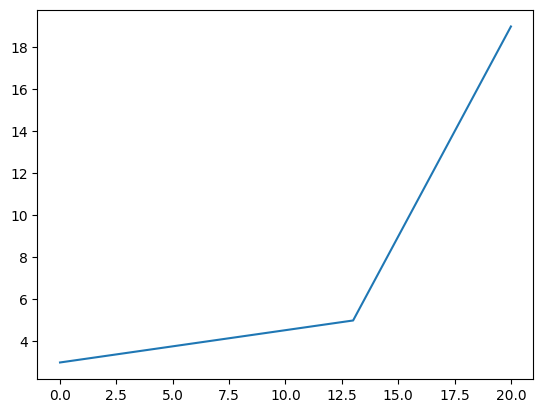

In [7]:
x_val = [0, 13, 20]
y_val = [3, 5,19]
plt.plot(x_val, y_val)

Observation:

The line starts at (0, 3), moves to (13, 5), and finally goes to (20, 19).
The y-axis values rise significantly as x increases, especially between x = 13 and x = 20, where there is a steeper slope compared to the initial segment.

# Univariate Data Visualization - Categorical **Data**

---

The bar plot is a univariate data visualization plot on a two-dimensional axis. One axis is the category axis indicating the category, while the second axis is the value axis that shows the numeric value of that category, indicated by the length of the bar


In [8]:
cat_counts = data['Genre'].value_counts()
cat_counts

,count
Genre,
Action,3316
Sports,2400
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


Observation:

Here different types of games has been there with various count



1. data['Genre']:

This accesses the Genre column of the DataFrame data. The assumption is that data is a pandas DataFrame, and Genre is a column within it, likely containing categorical values (like different genres of movies, books, music, etc.).

2. value_counts():

This method counts the unique values in the Genre column. It returns a Series where:
The index represents each unique genre in the column.
The values represent the count (frequency) of each genre.


  

3.  cat_counts:

This variable stores the result of data['Genre'].value_counts(). It will contain a Series where each genre and its count are listed in descending order, with the most frequent genre at the top.




Creating graph using different plot can use to visualize the information bar chart and count plot

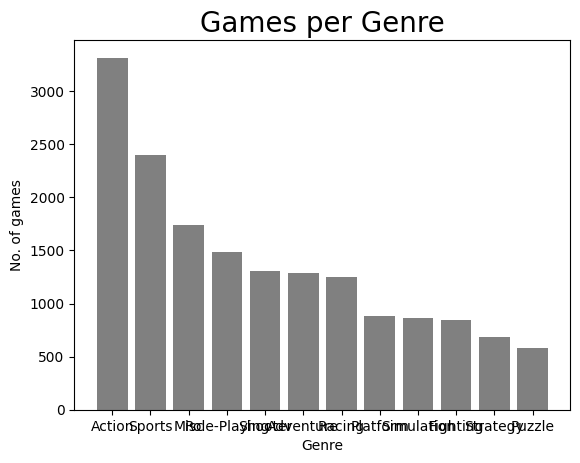

In [12]:
x_bar=cat_counts.index # generate verical bar chart or normal bar graph
y_bar=cat_counts
plt.xlabel('Genre')
plt.ylabel('No. of games')
plt.title('Games per Genre', fontsize=20)
r = plt.bar(x_bar,y_bar, color='grey') # storeable but not callable

**Plot Elements:**

The x-axis represents different game genres (like Action, Sports, Role-Playing, etc.).
The y-axis shows the count of games in each genre.
The chart title, "Games per Genre," is displayed prominently at the top in a larger font size (fontsize=20).
The x-axis is labeled "Genre," and the y-axis is labeled "No. of games."

**Bar Colors:**

The bars are colored grey (color='grey').

Observation :

The genre names on the x-axis are quite compressed, making them hard to read. This could be improved by rotating the labels or increasing the figure size to enhance readability.